In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('./../..')
from dynaphos import utils



results = pd.read_csv('results/predicted_temporal_dynamics.csv')
activation, brightness = results['predicted_activation_'], results['predicted_brightness_']
y_pred = brightness 
# y_true = results['']


r_squared = pd.read_csv('results/r_squared.csv', index_col=0, squeeze=True)['r-squared']

In [96]:

# Load colorstyles 
plt.style.use('../_figurestyle/small.mplstyle')
COLORSTYLE = utils.load_params('../_figurestyle/colors.yaml')

LINE_COLOR = COLORSTYLE['red'][1]
BOUNDS_COLOR = COLORSTYLE['turquoise'][2]

In [97]:
def plot_schmidt_repro(data, y_pred, line_color='#ba1319', bounds_color='#63c4ab'):
  
    # Normalize and remove zeros
    y_pred = y_pred/y_pred.max()
    

    ## Perform regression
    
    # True data
    x = data.time
    y_true = data.y_mean
    conf_95 = (data.conf_95_lower, data.conf_95_upper)


    ## Plot figures
    fig, axs = plt.subplots(2,1,sharey=True,figsize=(4,3), dpi=400) 
    axs = axs.ravel()

    # First plot only the first 50 series of stimulation, then plot the total sequence
    for i, n in enumerate([50, len(x)]):
        axs[i].fill_between(x[:n], conf_95[0][:n], conf_95[1][:n],color=bounds_color, label='95% confidence interval')
        axs[i].plot(x[:n], y_true[:n], '--', c='k', label='mean of data')
        axs[i].plot(x[:n], y_pred[:n],'-o', c=line_color, label='model prediction',markersize=3)

        axs[i].set(ylabel = 'Brightness (relative)',
                   xlabel = 'Time [s]',
                   ylim   = [0,1.1],)

        # Re-order legend 
        handles, labels = axs[i].get_legend_handles_labels()
        handles = [handles[0],handles[2],handles[1]]
        labels = [labels[0],labels[2],labels[1]]
        axs[i].legend(handles, labels)
    
#     for x in data.time:
#         axs[1].axvline(x, color='k', linewidth=0.5, linestyle='-',alpha=0.3)
#         if x<200:
#             axs[0].axvline(x, color='k', linewidth=0.05, linestyle='--')
    
    plt.tight_layout()
    plt.show()
    
    return fig, axs


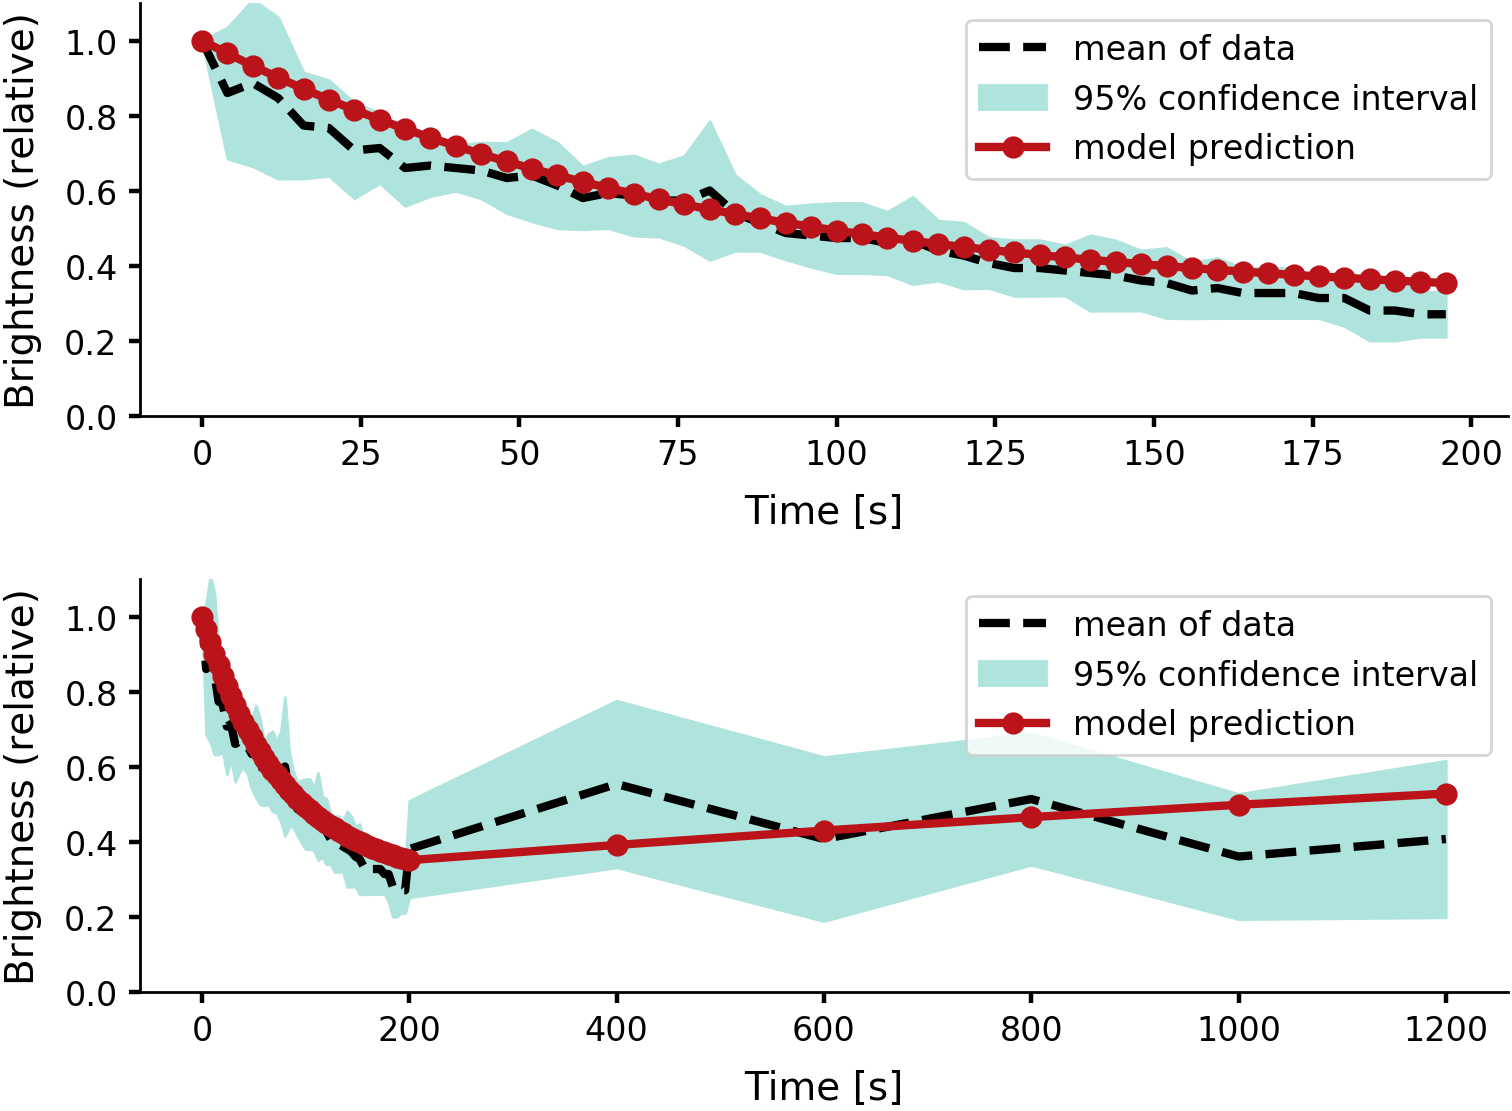

In [98]:

fig,axs = plot_schmidt_repro(data=results, y_pred=y_pred.copy(), line_color=LINE_COLOR, bounds_color=BOUNDS_COLOR)

/scratch/jaap/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:70: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


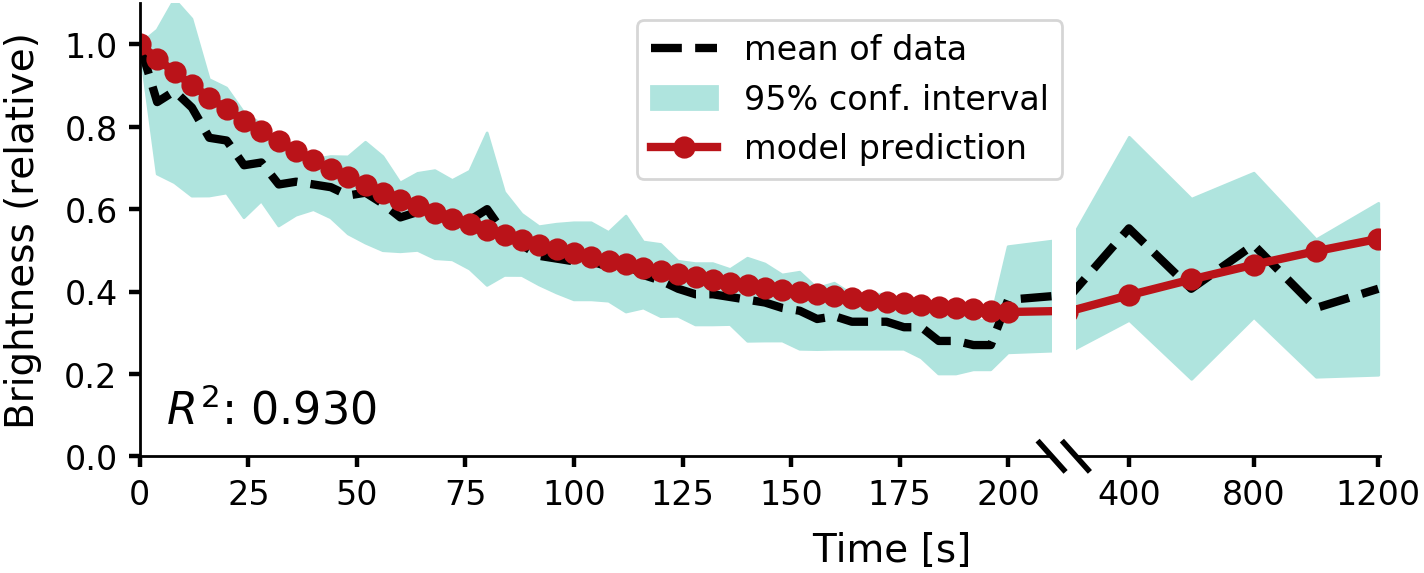

In [281]:
def plot_schmidt_repro2(data, y_pred, line_color='#ba1319', bounds_color='#63c4ab'):
  
    # Normalize and remove zeros
    y_pred = y_pred/y_pred.max()
    

    ## Perform regression
    
    # True data
    x = data.time
    y_true = data.y_mean
    conf_95 = (data.conf_95_lower, data.conf_95_upper)

    
    ratio = 0.75
    
    wspace = 0.04
    
    ## Plot figures
    fig, axs = plt.subplots(1,2,sharey=True,figsize=(4,1.5), dpi=400, gridspec_kw={'width_ratios':[ratio,1-ratio],
                                                                                   'wspace':wspace}) 
    axs = axs.ravel()

    # First plot only the first 210 seconds of stimulation, then plot the total sequence
    for i, xlim in enumerate([(0,210), (230,1205)]):
        axs[i].fill_between(x, conf_95[0], conf_95[1],color=bounds_color, label='95% conf. interval')
        axs[i].plot(x, y_true, '--', c='k', label='mean of data')
        axs[i].plot(x, y_pred,'-o', c=line_color, label='model prediction',markersize=3)

        axs[i].set(ylim   = [0,1.1],
                   xlim   = xlim)

    # Re-order legend 
    handles, labels = axs[0].get_legend_handles_labels()
    handles = [handles[0],handles[2],handles[1]]
    labels = [labels[0],labels[2],labels[1]]
    axs[0].legend(handles, labels, bbox_to_anchor=(1.03, 1.))
    
    # Put axlabels in first plot
    axs[0].set(ylabel = 'Brightness (relative)',
               xlabel = 'Time [s]')
    
    # Move the x-label slightly to the right
    axs[0].xaxis.set_label_coords(1.1*ratio, -0.165)
    
    # Plot the R-squared value
    axs[0].text(6,0.08,f"$R^2$: {r_squared:.3f}", ha='left')
    
    ## BREAK in x-axit
    
    # remove spines
    axs[0].spines['right'].set_visible(False)
    axs[1].spines['left'].set_visible(False)
    axs[1].tick_params(left=False) 
    axs[1].set_xticks([400,800,1200])
    
    # Plot break lines
    
    h=0.03 # height
    w=0.01 # width
    ws = 1/(1- ratio) # scales the width
    kwargs = dict(transform=axs[1].transAxes, color='k', clip_on=False)
    axs[1].plot((w*ws, -w*ws), (-h, +h), linewidth=1, **kwargs)
    
    ws = 1/(ratio)
    kwargs.update(transform=axs[0].transAxes)
    axs[0].plot((1+w*ws, 1-w*ws), (-h, +h), linewidth=1, **kwargs)        # top-left diagonal

    
    plt.tight_layout()
    plt.show()
    
    
    
    return fig, axs


fig,axs = plot_schmidt_repro2(data=results, y_pred=y_pred.copy(), line_color=LINE_COLOR, bounds_color=BOUNDS_COLOR)

In [273]:
fig.savefig('results/Temporal_dynamics_restyled.png')